<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/nn_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [4]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

X, Y = gaussian_quantiles

In [6]:
X.shape

(1000, 2)

In [7]:
Y.shape

(1000,)

In [8]:
Y = Y[:, np.newaxis]

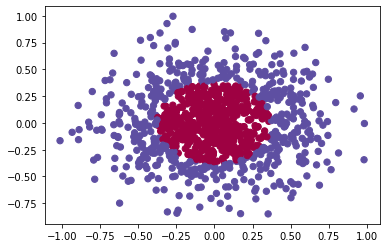

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral)

**Funciones de Activacion**

In [11]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x) / ((np.exp(-x) + 1) ** 2)
  
  return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
  if derivate:
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
  
  return np.maximum(0, x)

**Funcion de Perdida**

In [12]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)

  return np.mean((y_hat - y)**2)

**Estructura de la Red Neuronal**

In [13]:
def inizialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
    parameters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
  
  return parameters

In [14]:
layer_dims = [2, 4, 8, 1]
params = inizialize_parameters_deep(layer_dims)
params

{'W1': array([[ 0.34456445,  0.95280392, -0.47385867, -0.85456568],
        [ 0.02804858, -0.91750844, -0.54932296,  0.26026421]]),
 'b1': array([[ 0.8433653 , -0.99974   , -0.77991392, -0.77971114]]),
 'W2': array([[-0.41681023, -0.63137397,  0.48723311,  0.10628358, -0.55516818,
         -0.83475511, -0.07275087,  0.64942787],
        [ 0.69289765, -0.29960856,  0.51960351, -0.54056966,  0.89392178,
         -0.27989211, -0.73622746, -0.20291717],
        [-0.87578146,  0.06613367,  0.94679504, -0.54403592, -0.02598204,
          0.02928986,  0.0331542 ,  0.93622507],
        [-0.02724751, -0.34780654, -0.60532259,  0.57175062, -0.99918364,
          0.32154453, -0.44361829,  0.68713872]]),
 'b2': array([[ 0.98755754,  0.03744344, -0.01287957,  0.47783454, -0.63030241,
          0.07331281,  0.34168299,  0.33440343]]),
 'W3': array([[-0.8811823 ],
        [ 0.28228097],
        [ 0.8138947 ],
        [-0.55962839],
        [-0.26113932],
        [-0.38990634],
        [ 0.41344321],


In [15]:
params['W1'].shape

(2, 4)

In [16]:
X.shape

(1000, 2)

**Ahora aplicamos producto punto**

In [19]:
np.matmul(X, params['W1'])

array([[ 0.09352343,  0.18266587, -0.16760025, -0.20677629],
       [-0.09224155, -0.27131823,  0.11851442,  0.23415694],
       [ 0.13598941,  0.59503053, -0.07461637, -0.40985784],
       ...,
       [ 0.05328362,  0.55497204,  0.13595063, -0.26726458],
       [-0.14088075,  0.12768956,  0.4592435 ,  0.177951  ],
       [ 0.04195575, -0.38043007, -0.31251604,  0.06049809]])

In [20]:
# or

X@params['W1']

array([[ 0.09352343,  0.18266587, -0.16760025, -0.20677629],
       [-0.09224155, -0.27131823,  0.11851442,  0.23415694],
       [ 0.13598941,  0.59503053, -0.07461637, -0.40985784],
       ...,
       [ 0.05328362,  0.55497204,  0.13595063, -0.26726458],
       [-0.14088075,  0.12768956,  0.4592435 ,  0.177951  ],
       [ 0.04195575, -0.38043007, -0.31251604,  0.06049809]])

**Ahora hacemos el entrenamiento**

In [27]:
# ahora aplicamos producto punto en toda la red

# entrada de los valores
params
params['A0'] = X

# producto punto mas bias
params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
# funcion de activacion
params['A1'] = relu(params['Z1'])

# producto punto mas bias
params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
# funcion de activacion
params['A2'] = relu(params['Z2'])

# producto punto mas bias
params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
# funcion de activacion
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

In [28]:
output.shape

(1000, 1)

**Aplicando backpropagation y descenso del gradiente**